In [1]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Lendert Gelens - April 5, 2015
# Code to reproduce results from MBoC 25, pp. 3486 (2014) 
# Spatio-temporal dynamics of the FHN equation
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# system parameters  
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

a = 0.1
eps = 0.01
b = 2
D = 1

t_end = 400
deltat = 0.1
N = 400 #number of discretization points
L = 400 # domain size
t_save = 1
Bist = 1

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# function FHN equations
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
def FHN(a,b,eps,Bist,U,V):
    dU = U - Bist*U**3 - V
    dV = eps*(U - b*V + a)
    return [dU,dV];


#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# fourier mesh  + approximation discrete de l'opérateur de dérivee spatiale
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
def mesh_fourier(zmin,zmax,nz):
    dz = np.zeros((nz,nz))    
    for i in range(nz) : 
            for j in range(nz) :
                    if i == j: 
                        dz[i,i]=0
                        
                    else:
                        dz[i,j]=np.pi*(-1)**((i-1)+(j-1))/(zmax-zmin)/np.tan(((i-1)-(j-1))*np.pi/(nz))
            
    return dz

In [2]:

dz = mesh_fourier(0,L,N)

dz2 = np.dot(dz,dz)



(-1, 1)

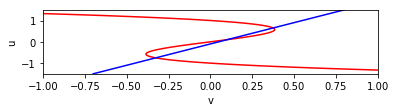

In [3]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# plot nullclines and steady states
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

u_nc = np.linspace(-1.5,1.5,100)
v_nc1 = u_nc - Bist*u_nc**3
v_nc2 = (u_nc + a)/b


fig = plt.figure()
ax = fig.add_subplot(3,1,1)
ax.plot(v_nc1,u_nc,'r')
ax.plot(v_nc2,u_nc,'b')
ax.set_xlabel('v')
ax.set_ylabel('u')
ax.set_ylim([-1.5,1.5])
ax.set_xlim([-1,1])





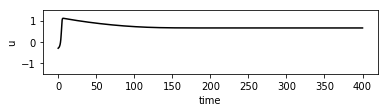

In [7]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# temporal simulation
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

counter = 0
u = -0.3 #initial condition
v = -0.3 #initial condition
time_arr = 0
U_arr = u
V_arr = v

for i in range(1,round(t_end/deltat)+1):
   
    counter = counter +1
    
    # solve FHN equations 
    [du,dv] = FHN(a,b,eps,Bist,u,v)
    u = u + deltat*(du)
    v = v + deltat*(dv)
   
    # save output
    if counter >= t_save/deltat:
       U_arr=np.append(U_arr,u)
       V_arr=np.append(V_arr,v)
       time_arr= np.append(time_arr,i*deltat)

fig = plt.figure()
ax = fig.add_subplot(3,1,2)
ax.plot(time_arr,U_arr,'k')
ax.set_xlabel('time')
ax.set_ylabel('u')
ax.set_ylim([-1.5,1.5])

plt.show()


In [11]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# spatial simulation
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

counter = 0
counter2 = 0
#start with two "chemicals" u & v with same initial condition everywhere
u = -0.6*np.ones(N)
v = -0.3*np.ones(N)

#choose the width of the central domain on which you will change this initial condition
width_centraldomain = 40
#change it
u[round(N/2-width_centraldomain/2):round(N/2+width_centraldomain/2)] = np.ones(width_centraldomain)

#empty arrays initialize: the solution will be stored in those arrays
U_arr = np.zeros((N,round(t_end/t_save)))
V_arr = np.zeros((N,round(t_end/t_save)))
time_arr = np.zeros((N,round(t_end/t_save)))
space_arr = np.zeros((N,round(t_end/t_save)))

dz = mesh_fourier(0,L,N)
dz2 = np.dot(dz,dz)


In [12]:
#loop over succesive time points and evolve the system at each step
for i in range(round(t_end/deltat)):
   
    counter = counter +1

    # solve FHN equations 
    [du,dv] = FHN(a,b,eps,Bist,u,v)
    u = u + deltat*(du + D*np.dot(dz2,u))
    v = v + deltat*(dv + D*np.dot(dz2,v))
    t = i*deltat
    # save output
    if t%t_save ==0 and t!=0:   
        counter = 0
        counter2 = counter2 +1
        U_arr[:,counter2] = u 
        V_arr[:,counter2] = v 
        time_arr[:,counter2] = np.ones(N)*t
        space_arr[:,counter2] = np.linspace(0,N,1)*(L/N)


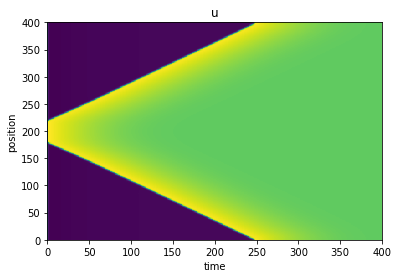

In [13]:
fig=plt.figure()
plt.pcolor(U_arr)
plt.title('u')
plt.xlabel('time')
plt.ylabel('position')
plt.show()